In [1]:
# create adjacency matrix of a weighted directed graph
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# define a function to create random adjacency matrix of a weighted directed graph with n nodes and weights between -10 and 10 with weights less than a threshold set to 0 and diagonal elements zero
def create_adj_matrix(n, threshold):
    # create a random adjacency matrix
    adj_matrix = np.random.rand(n, n) * 20 - 10
    # set the diagonal elements to zero
    np.fill_diagonal(adj_matrix, 0)
    # set the weights less than threshold to zero
    adj_matrix[abs(adj_matrix) < threshold] = 0
    # return the adjacency matrix
    return adj_matrix

# THIS FUNCTION IS TAKING LONG TIME TO RUN --> NEED TO OPTIMIZE
# # define a function that generates a matrix with positive principal minors
# def generate_p_matrix(n, threshold):
#     # x is I+G where G is a random adjacency matrix
#     x = np.identity(n) + create_adj_matrix(n, threshold)
#     # check if the matrix satisfies 2I+G+G' condition
#     while np.any(np.linalg.eigvals(x + x.T) <= 0):
#         x = np.identity(n) + create_adj_matrix(n, threshold)
#     # if 2I+G+G' is PD, the I+G is p-matrix. So, return I+G.
#     return x


#  define a function to plot the graph
def plot_graph(adj_matrix):
    G = nx.from_numpy_matrix(adj_matrix)
    elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0]
    esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0]
    # positions for all nodes - seed for reproducibility
    pos = nx.spring_layout(G, seed=7)
    # nodes
    nx.draw_networkx_nodes(G, pos, node_size=1)
    # edges
    nx.draw_networkx_edges(G, pos, edgelist=elarge, edge_color="b", width=0.1)
    nx.draw_networkx_edges(G, pos, edgelist=esmall, width=0.1, alpha=0.5, edge_color="r", style="dashed")
    # node labels
    nx.draw_networkx_labels(G, pos, font_size=1, font_family="sans-serif")
    ax = plt.gca()
    ax.margins(0.08)
    plt.axis("off")
    plt.tight_layout()
    plt.title('For '+str(G))
    plt.show()


# define a function to compute the maximum and minimum eigenvalues of the adjacency matrix
def compute_eigenvalues(adj_matrix):
    # compute the maximum eigenvalue of the adjacency matrix
    max_eig = np.max(np.linalg.eigvals(adj_matrix))
    # compute the minimum eigenvalue of the adjacency matrix
    min_eig = np.min(np.linalg.eigvals(adj_matrix))
    # return the maximum and minimum eigenvalues
    return max_eig, min_eig

# Numerical experiments for 2-layered networks
Checking the upper bound when :
- one of the matrices is p-matrix
- both are p-matrix

In [ ]:
# creating adjacency matrix for each layer (2 layers) with 50 nodes and 0.2 probability of zero elements for the first one and 0.5 for the second one
adj_matrix1 = create_adj_matrix(50, 3)
adj_matrix2 = create_adj_matrix(50, 2)

# checking if the adjacency matrix is p-matrix:
if np.any(np.linalg.eigvals(adj_matrix1 + adj_matrix1.T) <= 0):
    print("The adjacency matrix 1 is not p-matrix")

if np.any(np.linalg.eigvals(adj_matrix2 + adj_matrix2.T) <= 0):
    print("The adjacency matrix 2 is not p-matrix")

# plot the first layer
plot_graph(adj_matrix1)
# plot the second layer
plot_graph(adj_matrix2)

# creating interlayer relations, this would be identity matrix since we want to connect each node in the first layer to each node in the second layer
interlayer_relations = np.identity(50)

# creating the adjacency matrix of the whole graph
adj_matrix = np.block([[adj_matrix1, interlayer_relations], [interlayer_relations, adj_matrix2]])

# plot interlayer relations
plot_graph(interlayer_relations)

# Checking the bounds found with G+G' assumption.
In this section I'm going to check the bounds for 2I+G+G'. 
- upper bound = max_eig_1 + max_eig_2 - 2
- lower bound = min_eig_1 + min_eig_2 - 2

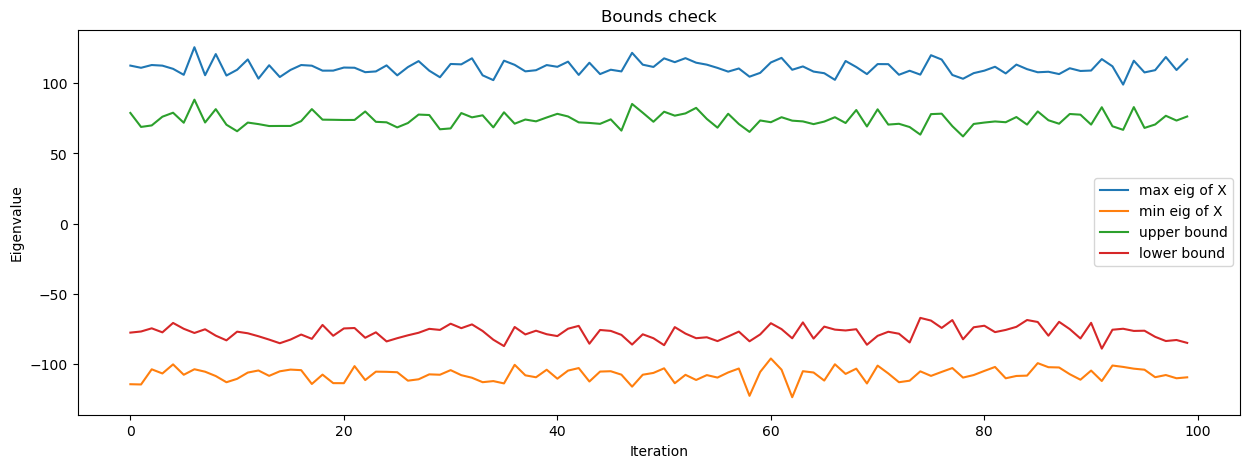

In [5]:
lower_bound = []
upper_bound = []
max_X = []
min_X = []

for i in range(100):
    # creating adjacency matrix for each layer (2 layers) with 50 nodes and 0.2 probability of zero elements for the first one and 0.5 for the second one
    adj_matrix1 = create_adj_matrix(50, 3)
    adj_matrix2 = create_adj_matrix(50, 2)
    # compute the maximum and minimum eigenvalues of the adjacency matrices
    max_eig1, min_eig1 = compute_eigenvalues(adj_matrix1)
    max_eig2, min_eig2 = compute_eigenvalues(adj_matrix2)
    lower_bound.append(min_eig1 + min_eig2 - 2)
    upper_bound.append(max_eig1 + max_eig2 - 2)
    # creating interlayer relations, this would be identity matrix since we want to connect each node in the first layer to each node in the second layer
    interlayer_relations = np.identity(50)
    # creating the adjacency matrix of the whole graph
    adj_matrix = np.block([[adj_matrix1, interlayer_relations], [interlayer_relations, adj_matrix2]])
    # creating the matrix we want to compute the eigenvalues of (2I+adj_matrix+adj_matrix.T)
    X = 2*np.identity(100) + adj_matrix + adj_matrix.T
    # computing the eigenvalues of the matrix   
    max_eig, min_eig = compute_eigenvalues(X)
    max_X.append(max_eig)
    min_X.append(min_eig)

# plotting the lower and upper bounds and the eigenvalues of the matrix
plt.figure(figsize=(15,5))
plt.plot(max_X, label='max eig of X')
plt.plot(min_X, label='min eig of X')
plt.plot(upper_bound, label='upper bound')
plt.plot(lower_bound, label='lower bound')
plt.xlabel('Iteration')
plt.ylabel('Eigenvalue')
plt.title('Bounds check')
plt.legend()
plt.show()
    